# Read the data

In [1]:
import hpbandster

In [2]:
from collections import Counter

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

## Seperate the trianing set and the test set

In [5]:
# training set should be subject: 01 05 06 07 08 09
name = os.listdir('./Protocol')
name.pop(1)
name.pop(1)
name.pop(1)
name

['subject101.dat',
 'subject105.dat',
 'subject106.dat',
 'subject107.dat',
 'subject108.dat',
 'subject109.dat']

In [6]:
train = pd.DataFrame()
for i in name:
    data = pd.read_csv('./Protocol/'+i,sep = ' ', header= None)
    train = train.append(data,ignore_index=True)

In [7]:
# vali_set is subject: 03 04
# test set is subject: 02
vali_03 = pd.read_csv('./Protocol/subject103.dat',sep = ' ', header= None)
vali = vali_03.append(pd.read_csv('./Protocol/subject104.dat',sep = ' ', header= None))

test = pd.read_csv('./Protocol/subject102.dat',sep = ' ', header= None)

## Rename the feature

In [8]:
columns_name = ['timestamps','id','heart_rate']
for i in range(train.shape[1]-3):
    columns_name.append('F' +str(i+1))
print(columns_name)
train.columns = columns_name
vali.columns = columns_name
test.columns = columns_name

['timestamps', 'id', 'heart_rate', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51']


## Drop the sensor 

In [9]:
# only the wrist sensor (ACC, GYRO) and heart rate monitor will be used

train = train.drop(train.columns[20:],axis=1)
vali = vali.drop(vali.columns[20:],axis=1)
test = test.drop(test.columns[20:],axis=1)

train.describe()

,timestamps,id,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17
count,1.843124e+06,1.843124e+06,168262.000000,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06
mean,1.845589e+03,5.619941e+00,110.833896,3.303286e+01,-4.777386e+00,3.142993e+00,3.310900e+00,-4.692671e+00,3.125025e+00,3.515536e+00,-7.247221e-03,4.009560e-02,-1.305646e-03,2.109244e+01,-1.334530e+01,-2.231899e+01,6.166227e-01,-3.894153e-02,-1.195681e-01,-3.796232e-02
std,1.084843e+03,6.362583e+00,27.666623,1.737555e+00,6.184029e+00,7.303992e+00,3.747499e+00,6.177649e+00,7.002546e+00,3.724935e+00,1.217097e+00,8.692353e-01,1.475253e+00,2.574793e+01,2.680143e+01,2.085267e+01,3.061710e-01,3.642234e-01,3.145593e-01,5.264749e-01
min,5.700000e+00,0.000000e+00,60.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,-2.813540e+01,-2.221270e+01,-1.521850e+01,-1.039410e+02,-2.000430e+02,-4.976320e+02,-4.522460e-01,-9.989440e-01,-9.749160e-01,-9.993260e-01
25%,9.109600e+02,0.000000e+00,90.000000,3.218750e+01,-8.982972e+00,-1.790760e-01,1.046830e+00,-8.870062e+00,-2.106145e-01,1.265580e+00,-3.504477e-01,-1.945110e-01,-3.118152e-01,3.891940e+00,-3.174760e+01,-3.608900e+01,3.652980e-01,-3.114813e-01,-3.682142e-01,-5.202370e-01
50%,1.832520e+03,4.000000e+00,108.000000,3.350000e+01,-5.407975e+00,3.348380e+00,3.070090e+00,-5.306445e+00,3.390390e+00,3.276240e+00,-6.837770e-03,5.649770e-03,-5.393820e-03,2.471290e+01,-1.481510e+01,-2.181460e+01,6.511105e-01,0.000000e+00,-4.304770e-02,0.000000e+00
75%,2.754080e+03,7.000000e+00,128.000000,3.425000e+01,-1.844275e-01,6.705653e+00,5.998410e+00,-5.510495e-02,6.683900e+00,6.265072e+00,2.927610e-01,2.397285e-01,3.181573e-01,4.063310e+01,6.737355e+00,-9.045690e+00,9.079980e-01,2.107735e-01,4.983580e-02,3.722790e-01
max,4.086190e+03,2.400000e+01,202.000000,3.550000e+01,6.091260e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.194460e+01,2.641580e+01,2.307790e+01,1.433840e+01,1.725900e+02,1.211760e+02,1.839110e+02,1.000000e+00,9.993700e-01,9.764060e-01,9.996770e-01


In [10]:
train=train.interpolate()
vali=vali.interpolate()
test=test.interpolate()

In [11]:
# The activities of the protocol subset were grouped in 7 classes 
# (lie, sit, stand, (nordic-)walking, stair climbing, sport (run, cycle, rope jump), house work (vacuum, iron))
# first: all the id = 0 (other (transient activities)) will be deleted
index=[x for i,x in enumerate(train.index) if train.iat[i,1]==0]
train=train.drop(index,axis=0)

index_vali=[x for i,x in enumerate(vali.index) if vali.iat[i,1]==0]
vali=vali.drop(index_vali,axis=0)

index_test=[x for i,x in enumerate(test.index) if test.iat[i,1]==0]
test=test.drop(index_test,axis=0)

train.index = range(len(train))
vali.index = range(len(vali))
test.index = range(len(test))

In [12]:
train.iloc[:,1]

0           1
1           1
2           1
3           1
4           1
           ..
1273759    24
1273760    24
1273761    24
1273762    24
1273763    24
Name: id, Length: 1273764, dtype: int64

# Rename the class

In [13]:
# then the activity id will be regrouped and renamed
# lying(1), sitting(2), standing(3) will remain the same
# Nordic_walking(7) and walking(4) will be regrouped as walking(3)
# ascending_stairs(12) and descending_stairs(13) will be regrouped as stair_climbing(4)
# running(5) cycling(6) and rope_jumping(24) will be regrouped as sport(5)
# vacuum_cleaning(16) and ironing(17) will be regrouped as house_work(6)

def regroupe(data):
    temp = np.array(data.iloc[:,1])
    temp[temp==1] = 0
    temp[temp==2] = 1 
    temp[temp==3] = 2 
    
    temp[temp==4] = 3 
    temp[temp==7] = 3 
    
    temp[temp==6] = 5 
    temp[temp==24] = 5
    
    temp[temp==12] = 4
    temp[temp==13] = 4
    
    temp[temp==16] = 6
    temp[temp==17] = 6
    data['id_n'] = temp
    return data

train = regroupe(train)

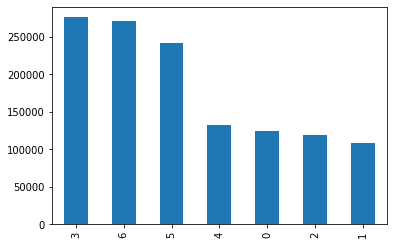

In [14]:
train['id_n'].value_counts().plot.bar()
plt.show()

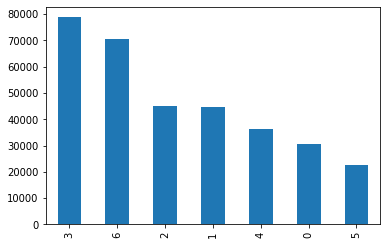

In [15]:
vali = regroupe(vali)

vali['id_n'].value_counts().plot.bar()
plt.show()

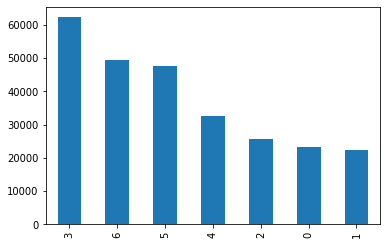

In [16]:
test = regroupe(test)

test['id_n'].value_counts().plot.bar()
plt.show()

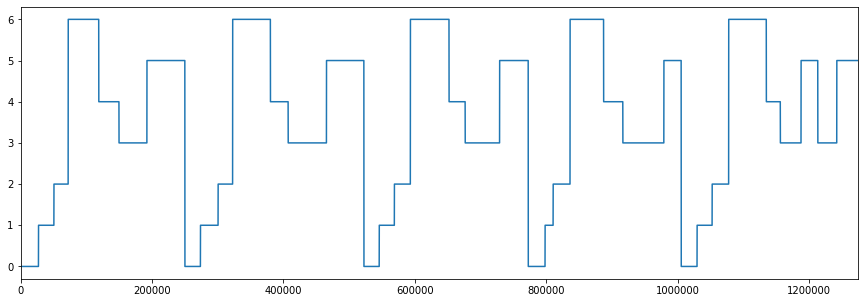

In [17]:
train['id_n'].plot(figsize = (15,5))

In [18]:
train = train.drop(columns=['id','timestamps'],axis=1)
vali = vali.drop(columns=['id','timestamps'],axis=1)
test = test.drop(columns=['id','timestamps'],axis=1)

In [19]:
train

,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,id_n
0,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.000000,0.000000,0.000000,0.000000,0
1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.000000,0.000000,0.000000,0.000000,0
2,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.000000,0.000000,0.000000,0.000000,0
3,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.000000,0.000000,0.000000,0.000000,0
4,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273759,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,-0.289166,-0.110170,0.238570,-4.79353,-18.1271,-48.2695,0.823022,-0.256932,0.401650,0.308704,5
1273760,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,-0.275411,-0.128358,0.267409,-4.54101,-18.0169,-48.9268,0.823742,-0.255166,0.401881,0.307947,5
1273761,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,-0.289885,-0.126548,0.281483,-4.17401,-17.9121,-48.4032,0.824497,-0.253507,0.402103,0.307006,5
1273762,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,-0.234417,-0.101485,0.275497,-4.66091,-18.2588,-49.0563,0.824995,-0.252236,0.402400,0.306323,5


# Feature extention

## Difference with previous row

In [20]:
def cal_diff(data, sensor_name,diff_periods = 40):
    _id =1
    sensor_diff = []
    #判断每一个数列的长度是否大于diff_periods
    
    sensor_diff_temp=data.diff(periods=diff_periods)
    # 第0到 diff_periods-1 应该是每一个值-第一个值
    for i in range(diff_periods):
        sensor_diff.append(data.iloc[i]-data.iloc[0])
    # diff_periods个值之后应该是每一个值-向前推diff_periods位的值
    for j in range (len(data)-diff_periods):
        sensor_diff.append(sensor_diff_temp.iloc[diff_periods+j])

    return sensor_diff

In [21]:
def get_sensor_name(data):
    sensor_name = []
    list(data.columns)
    sensor_name = list(data.columns)
    sensor_name = sensor_name[:-1]
    return sensor_name

def add_diff(data,sensor_name):
    for i in range(len(sensor_name)):
        sensor_name_temp = sensor_name[i]
        data_temp = pd.Series(data[sensor_name_temp])
        diff = cal_diff(data_temp,sensor_name=sensor_name_temp) 
        name = sensor_name_temp+'_diff'
        data[name] = diff
    return data
    

In [22]:
sensor_name = get_sensor_name(train)
train = add_diff(train,sensor_name)

vali = add_diff(vali,sensor_name)

test = add_diff(test,sensor_name)

In [23]:
# change the sequence of the column
cols = list(train)
cols.insert(36,cols.pop(cols.index('id_n')))
train = train.loc[:,cols]

vali = vali.loc[:,cols]

test = test.loc[:,cols]

In [24]:
train

,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F9_diff,F10_diff,F11_diff,F12_diff,F13_diff,F14_diff,F15_diff,F16_diff,F17_diff,id_n
0,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,...,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0
1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,...,-0.012100,0.001607,0.651000,-0.0258,-0.9336,0.000000,0.000000,0.000000,0.000000,0
2,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,...,-0.026365,0.011976,0.123160,0.5309,0.4672,0.000000,0.000000,0.000000,0.000000,0
3,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,...,-0.018525,0.024519,0.994980,0.4939,-0.5847,0.000000,0.000000,0.000000,0.000000,0
4,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,...,-0.055906,0.015727,0.224260,0.7501,-0.1102,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273759,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,-0.289166,-0.110170,...,-0.049738,0.350119,-4.879131,2.2462,0.2587,-0.005428,0.038004,0.025822,0.016408,5
1273760,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,-0.275411,-0.128358,...,-0.021895,0.418070,-4.113074,1.7078,-1.3143,-0.004619,0.038933,0.026149,0.014435,5
1273761,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,-0.289885,-0.126548,...,0.019405,0.447233,-3.392391,2.4151,0.5172,-0.003732,0.039544,0.026366,0.012085,5
1273762,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,-0.234417,-0.101485,...,0.054541,0.480072,-4.739776,1.6177,-0.5251,-0.002921,0.040312,0.026651,0.010040,5


## standard normalization 

In [25]:
mean = train.iloc[:, :-1].mean()
std = train.iloc[:,:-1].std()
std.replace(0, 1, inplace=True)
train.iloc[:,:-1] = (train.iloc[:, :-1] - mean) / std
vali.iloc[:,:-1] = (vali.iloc[:, :-1] - mean) / std
test.iloc[:,:-1] = (test.iloc[:, :-1] - mean) / std

In [26]:
train.describe()

,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F9_diff,F10_diff,F11_diff,F12_diff,F13_diff,F14_diff,F15_diff,F16_diff,F17_diff,id_n
count,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,...,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06
mean,-8.757865e-14,-4.297001e-13,-8.181833e-15,-4.290767e-15,6.889649e-14,-1.553561e-14,-2.600895e-14,6.254602e-15,-4.568987e-16,-2.767462e-15,...,-8.284788e-18,-5.897104e-18,2.121237e-17,-3.885978e-18,-1.722118e-18,6.132829e-17,-3.995711e-17,-5.238702e-17,8.005887e-18,3.566672e+00
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.941462e+00
min,-1.688026e+00,-4.806541e+00,-2.175247e+01,-1.340849e+01,-2.613608e+01,-8.762022e+00,-8.541123e+00,-1.648913e+01,-2.194320e+01,-1.901157e+01,...,-1.533296e+01,-6.852925e+00,-9.169362e+00,-9.880715e+00,-1.451308e+01,-7.486390e+00,-8.460494e+00,-8.828410e+00,-5.508026e+00,0.000000e+00
25%,-7.466459e-01,-4.654241e-01,-6.318869e-01,-4.235058e-01,-6.120646e-01,-6.267451e-01,-4.412213e-01,-6.130495e-01,-2.993376e-01,-2.901568e-01,...,-2.542294e-01,-2.134063e-01,-2.255439e-01,-2.559711e-01,-2.910772e-01,-1.702401e-01,-7.364385e-02,-9.205038e-02,-5.751365e-02,2.000000e+00
50%,-1.887911e-01,2.641755e-01,-3.599913e-02,1.340819e-02,-4.041656e-02,-3.124879e-02,2.297953e-02,-2.971913e-02,-2.490007e-03,-4.870676e-02,...,-1.650706e-03,2.846533e-04,4.122214e-04,8.362184e-04,1.033347e-04,4.656913e-05,3.838055e-05,-6.031206e-05,-2.706745e-05,4.000000e+00
75%,6.131252e-01,7.384152e-01,6.823425e-01,4.149540e-01,7.294146e-01,6.911812e-01,4.400886e-01,7.474455e-01,2.588105e-01,2.352821e-01,...,2.234058e-01,2.276852e-01,2.447100e-01,2.728333e-01,2.895808e-01,1.696324e-01,8.598247e-02,9.452700e-02,4.950154e-02,5.000000e+00
max,3.262936e+00,1.395055e+00,1.016410e+01,1.900417e+01,3.835575e+01,8.918333e+00,7.748668e+00,1.457867e+01,2.060770e+01,2.445434e+01,...,1.363087e+01,8.953837e+00,7.960218e+00,1.047465e+01,1.560384e+01,7.001904e+00,8.436074e+00,8.852583e+00,5.505458e+00,6.000000e+00


In [27]:
test.shape[0]

263349

## save the vali-set and test-set

In [ ]:
vali.to_csv("vali.csv",index=False,sep=',')

In [ ]:
test.to_csv("test.csv",index=False,sep=',')

# Batch Generator

## duplicating samples of underrepresented classes

In [28]:
x = train.iloc[:,:-1]
x

,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F8_diff,F9_diff,F10_diff,F11_diff,F12_diff,F13_diff,F14_diff,F15_diff,F16_diff,F17_diff
0,-0.293389,-1.596303,1.082171,0.626207,0.495311,1.077173,0.699129,0.493859,-0.000798,-0.015046,...,0.000003,0.000006,-6.890044e-07,0.000022,-0.000102,0.000085,0.000047,0.000038,-0.000060,-0.000027
1,-0.293389,-1.596303,1.094032,0.550627,0.534407,1.081335,0.645581,0.497862,-0.131029,-0.027897,...,-0.088484,-0.007734,5.759856e-04,0.041374,-0.001810,-0.087703,0.000047,0.000038,-0.000060,-0.000027
2,-0.293389,-1.596303,1.093868,0.484495,0.554000,1.080704,0.582150,0.498131,-0.182925,-0.043047,...,-0.123745,-0.016860,4.297381e-03,0.007845,0.035046,0.044016,0.000047,0.000038,-0.000060,-0.000027
3,-0.293389,-1.596303,1.082589,0.484651,0.572879,1.073279,0.528683,0.521092,-0.147567,-0.034721,...,-0.099721,-0.011845,8.799217e-03,0.063223,0.032597,-0.054896,0.000047,0.000038,-0.000060,-0.000027
4,-0.293389,-1.596303,1.095440,0.498977,0.620970,1.071020,0.526723,0.540042,-0.051664,-0.074420,...,-0.034559,-0.035758,5.643594e-03,0.014267,0.049558,-0.010278,0.000047,0.000038,-0.000060,-0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273759,1.868299,-4.660622,1.512207,0.344424,0.497991,1.489736,0.371490,0.471821,-0.222647,-0.171959,...,-0.104215,-0.031811,1.256565e-01,-0.309901,0.148607,0.024411,-0.045239,0.168940,0.127442,0.045449
1273760,1.868299,-4.660622,1.517310,0.330072,0.469483,1.487105,0.357615,0.441580,-0.211918,-0.191275,...,-0.028129,-0.014000,1.500440e-01,-0.261241,0.112963,-0.123501,-0.038489,0.173069,0.129057,0.039981
1273761,1.868299,-4.660622,1.522949,0.306388,0.469779,1.500890,0.347606,0.415084,-0.223208,-0.189353,...,-0.017779,0.012420,1.605106e-01,-0.215463,0.159789,0.048718,-0.031089,0.175784,0.130128,0.033468
1273762,1.868299,-4.660622,1.534561,0.296856,0.470123,1.500439,0.323800,0.373519,-0.179942,-0.162736,...,-0.019761,0.034896,1.722965e-01,-0.301049,0.106998,-0.049291,-0.024323,0.179197,0.131535,0.027800


In [29]:
y = train.iloc[:,-1]
y

0          0
1          0
2          0
3          0
4          0
          ..
1273759    5
1273760    5
1273761    5
1273762    5
1273763    5
Name: id_n, Length: 1273764, dtype: int64

In [30]:
x_resampled, y_resampled = SMOTE().fit_resample(x, y)

In [31]:
x_resampled.shape

(1932665, 36)

In [32]:
y_resampled.shape

(1932665,)

In [33]:
x_resampled

,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F8_diff,F9_diff,F10_diff,F11_diff,F12_diff,F13_diff,F14_diff,F15_diff,F16_diff,F17_diff
0,-0.293389,-1.596303,1.082171,0.626207,0.495311,1.077173,0.699129,0.493859,-0.000798,-0.015046,...,0.000003,0.000006,-6.890044e-07,0.000022,-0.000102,0.000085,0.000047,0.000038,-0.000060,-0.000027
1,-0.293389,-1.596303,1.094032,0.550627,0.534407,1.081335,0.645581,0.497862,-0.131029,-0.027897,...,-0.088484,-0.007734,5.759856e-04,0.041374,-0.001810,-0.087703,0.000047,0.000038,-0.000060,-0.000027
2,-0.293389,-1.596303,1.093868,0.484495,0.554000,1.080704,0.582150,0.498131,-0.182925,-0.043047,...,-0.123745,-0.016860,4.297381e-03,0.007845,0.035046,0.044016,0.000047,0.000038,-0.000060,-0.000027
3,-0.293389,-1.596303,1.082589,0.484651,0.572879,1.073279,0.528683,0.521092,-0.147567,-0.034721,...,-0.099721,-0.011845,8.799217e-03,0.063223,0.032597,-0.054896,0.000047,0.000038,-0.000060,-0.000027
4,-0.293389,-1.596303,1.095440,0.498977,0.620970,1.071020,0.526723,0.540042,-0.051664,-0.074420,...,-0.034559,-0.035758,5.643594e-03,0.014267,0.049558,-0.010278,0.000047,0.000038,-0.000060,-0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932660,-0.990707,0.227695,0.283188,-0.329295,1.874324,0.288860,-0.342128,1.899203,0.419458,-0.493227,...,0.263127,-0.368439,-3.955486e-01,-0.101137,-0.175235,-0.028186,-0.373321,-0.074700,0.171876,0.068398
1932661,-0.572316,0.957295,-0.145139,-0.378209,0.969388,-0.117473,-0.410484,0.970611,-0.700480,-0.041169,...,-0.245044,-0.046492,3.013956e-01,-0.890420,-0.509617,-0.797671,-2.633374,0.343844,0.278192,-1.037099
1932662,-0.607182,1.358575,0.776464,0.369185,0.509236,0.814550,0.522653,0.627493,2.340747,-0.857353,...,1.877830,-0.919119,-1.780967e-01,0.067390,0.899992,-1.427978,1.519997,0.273182,-0.838990,0.042014
1932663,0.264466,0.519535,-0.739429,0.214571,-0.821217,-0.723633,0.325109,-1.322911,0.567056,0.091180,...,1.031027,-0.492556,-7.577915e-02,0.248521,0.495615,0.417057,-0.452327,0.316306,-0.437469,0.412535


In [34]:
x_resampled['id_n'] = y_resampled

In [35]:
x_resampled

,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F9_diff,F10_diff,F11_diff,F12_diff,F13_diff,F14_diff,F15_diff,F16_diff,F17_diff,id_n
0,-0.293389,-1.596303,1.082171,0.626207,0.495311,1.077173,0.699129,0.493859,-0.000798,-0.015046,...,0.000006,-6.890044e-07,0.000022,-0.000102,0.000085,0.000047,0.000038,-0.000060,-0.000027,0
1,-0.293389,-1.596303,1.094032,0.550627,0.534407,1.081335,0.645581,0.497862,-0.131029,-0.027897,...,-0.007734,5.759856e-04,0.041374,-0.001810,-0.087703,0.000047,0.000038,-0.000060,-0.000027,0
2,-0.293389,-1.596303,1.093868,0.484495,0.554000,1.080704,0.582150,0.498131,-0.182925,-0.043047,...,-0.016860,4.297381e-03,0.007845,0.035046,0.044016,0.000047,0.000038,-0.000060,-0.000027,0
3,-0.293389,-1.596303,1.082589,0.484651,0.572879,1.073279,0.528683,0.521092,-0.147567,-0.034721,...,-0.011845,8.799217e-03,0.063223,0.032597,-0.054896,0.000047,0.000038,-0.000060,-0.000027,0
4,-0.293389,-1.596303,1.095440,0.498977,0.620970,1.071020,0.526723,0.540042,-0.051664,-0.074420,...,-0.035758,5.643594e-03,0.014267,0.049558,-0.010278,0.000047,0.000038,-0.000060,-0.000027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932660,-0.990707,0.227695,0.283188,-0.329295,1.874324,0.288860,-0.342128,1.899203,0.419458,-0.493227,...,-0.368439,-3.955486e-01,-0.101137,-0.175235,-0.028186,-0.373321,-0.074700,0.171876,0.068398,6
1932661,-0.572316,0.957295,-0.145139,-0.378209,0.969388,-0.117473,-0.410484,0.970611,-0.700480,-0.041169,...,-0.046492,3.013956e-01,-0.890420,-0.509617,-0.797671,-2.633374,0.343844,0.278192,-1.037099,6
1932662,-0.607182,1.358575,0.776464,0.369185,0.509236,0.814550,0.522653,0.627493,2.340747,-0.857353,...,-0.919119,-1.780967e-01,0.067390,0.899992,-1.427978,1.519997,0.273182,-0.838990,0.042014,6
1932663,0.264466,0.519535,-0.739429,0.214571,-0.821217,-0.723633,0.325109,-1.322911,0.567056,0.091180,...,-0.492556,-7.577915e-02,0.248521,0.495615,0.417057,-0.452327,0.316306,-0.437469,0.412535,6


In [36]:
def batch_generator_1(data, sequence_length=15, window_size = 10, sliding = 10):
    #batch_number = data.shape[0]/(sequence_length+window_size-1)
    feature_number = data.shape[1]-1
    window_number = int((data.shape[0]-window_size)/sliding)
    temp_shape = (window_number, window_size, data.shape[1])
    temp = np.zeros(shape=temp_shape, dtype=np.float32)
    for window in range(window_number):
        temp[window] = data.iloc[window*sliding:window*sliding+window_size,:]
        
    return temp

def batch_generator(temp,sequence_length,window_size):
    feature_number = temp.shape[2]-1
    batch_number = int(temp.shape[0]/sequence_length)
    x_shape = (batch_number, sequence_length, window_size, feature_number)
    x_batch = np.zeros(shape=x_shape, dtype=np.float32)
    y_shape = (batch_number, sequence_length, window_size)
    y_batch = np.zeros(shape=y_shape, dtype=np.float32)
    for Batch in range(batch_number):
        for seq in range(sequence_length):
            x_batch[Batch,seq] = temp[Batch*sequence_length+seq,:,:-1]
            #y_batch[Batch] = max(temp[Batch*sequence_length:Batch*sequence_length-1,:,-1],key=temp[Batch*sequence_length:Batch*sequence_length-1,:,-1].tolist().count)
            y_batch[Batch,seq] = temp[Batch*sequence_length+seq,:,-1]
    return x_batch, y_batch

In [37]:
sequence_length = 20
window_size = 109
kernel_size = 3
sliding = 3

In [38]:
train = batch_generator_1(x_resampled,sequence_length=sequence_length, window_size=window_size,sliding = sliding)

In [39]:
train.shape

(644185, 109, 37)

In [57]:
x_resampled.to_csv("Train.csv",index=False,sep=',')

In [40]:
x_batch, y_batch= batch_generator(train,sequence_length=sequence_length, window_size=window_size)
x_batch = np.expand_dims(x_batch, axis=4)

In [41]:
y_batch.shape

(32209, 20, 109)

In [42]:
def y_batch_generator(y_batch,sequence_length=15,num_classes=7):
    batch_number = y_batch.shape[0]
    y_batch_n = y_batch
    y_shape = (batch_number, sequence_length)
    y_new = np.zeros(shape=y_shape, dtype=np.float32)
    y_batch_new_shape = (batch_number,sequence_length,num_classes)
    y_batch_new = np.zeros(shape=y_batch_new_shape, dtype=np.float32)
    y_temp = y_batch_n.tolist()
    for batch in range(batch_number):
        for seq in range(sequence_length):
            temp_1 = list(Counter(y_temp[batch][seq]).most_common(1))
            y_new[batch,seq]=list(temp_1[0])[0]
        y_batch_new[batch] = tf.keras.utils.to_categorical(y_new[batch],num_classes=num_classes)
        
    return y_batch_new
        
        

In [43]:
y_batch = y_batch_generator(y_batch,sequence_length = sequence_length)

In [44]:
y_batch.shape

(32209, 20, 7)

# Batch generator for vali-set

In [45]:
vali = batch_generator_1(vali,sequence_length=sequence_length, window_size=window_size)

In [46]:
x_batch_vali, y_batch_vali= batch_generator(vali,sequence_length=sequence_length, window_size=window_size)

In [47]:
x_batch_vali = np.expand_dims(x_batch_vali, axis=4)

In [48]:
y_batch_vali = y_batch_generator(y_batch_vali,sequence_length=sequence_length)
y_batch_vali = np.array(y_batch_vali)

In [49]:
y_batch_vali.shape

(1645, 20, 7)